# step 0 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

# step 1 데이터 구성하기

In [5]:
df = pd.read_csv("부품수리시간.csv", engine='python')
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


# step 2 변수간의 경향성 파악
그래프(산점도) 분석


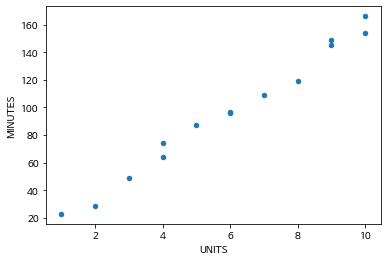

In [7]:
 df.plot.scatter(x="UNITS", y="MINUTES")

상관관계 분석

In [8]:
df.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


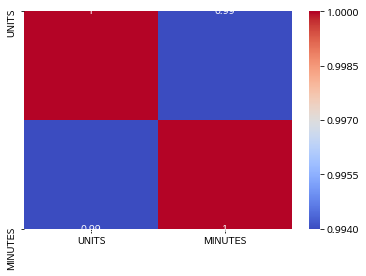

In [13]:
sns.heatmap(df.corr().round(3), annot=True, cmap="coolwarm")
plt.show()

# step 3 회귀모델 생성

In [16]:
model = smf.ols(formula="MINUTES~UNITS", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           8.92e-13
Time:                        13:14:04   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

# step 4 오차의 기본가정 검토
등분산성/독립성 검정

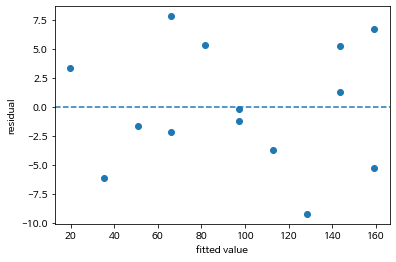

In [18]:
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0,linestyle='--')

정규성 검정

NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

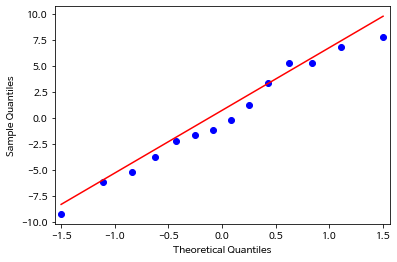

In [25]:
qqplot(result.resid, line='q')
from statsmodels.stats.stattools import omni_normtest 
omni_normtest(result.resid, axis=0)

# 다중 회귀 분석

# step 0 패키지불러오기

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


# step 1 데이터 구성하기

In [33]:
df = pd.read_csv("체질검사.csv", engine='python')
df.head(20)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
5,24.2,40,202.25,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0
6,23.3,52,167.00,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9
7,26.0,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
8,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
9,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8


## bmi 계산

In [71]:
bmi = []
for i in range(len(df)):
    weight = df.loc[i]['WEIGHT']
    height = df.loc[i]['HEIGHT']
    
    

363.15
168.0
177.75
147.75
219.0
202.25
167.0
230.0
184.25
127.5
150.0
152.25
158.0
189.75
198.25
178.0
161.25
140.0
223.0
194.75
167.0
118.5
232.75
146.75
159.75
200.25
193.5
167.5
161.75
140.25
151.0
228.25
215.5
165.5
160.25
167.0
136.25
209.25
170.75
155.25
241.25
168.5
151.25
198.5
183.75
202.5
178.75
182.5
126.5
133.25
179.75
244.25
162.5
143.75
200.5
143.0
177.25
176.75
205.25
202.25
206.5
192.5
154.25
157.0
135.75
216.25
170.5
205.5
180.5
187.75
184.0
166.25
201.0
136.5
210.5
170.75
190.25
176.0
205.0
159.25
148.25
217.0
262.75
173.25
210.25
164.25
212.75
196.75
151.5
125.0
196.0
142.25
195.0
182.0
188.75
158.25
197.0
171.5
168.25
153.25
234.75
183.25
187.75
155.5
191.0
187.25
179.75
218.75
185.25
217.0
154.0
160.5
224.75
154.5
226.75
152.25
203.25
224.5
224.5
160.75
179.75
176.75
177.5
198.0
224.75
160.75
172.75
169.5
216.0
179.0
206.5
163.0
183.5
177.25
131.5
168.25
212.0
218.5
160.0
168.75
191.75
134.25
181.0
193.25
247.25
156.25
150.25
133.5
149.25
154.5
125.75
186.75
194.0

# step 2 변수간의 경향성 파악 - 그래프 분석

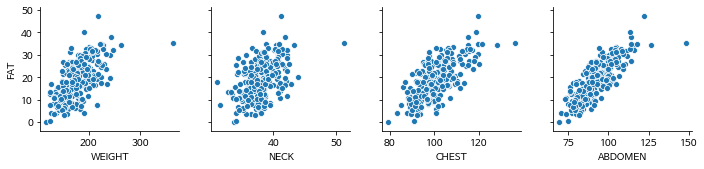

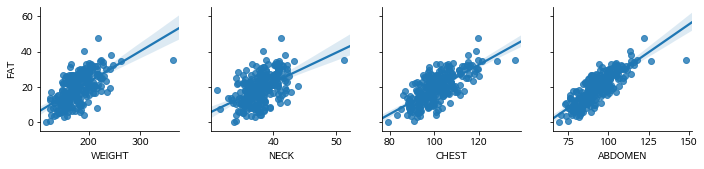

In [35]:
sns.pairplot(df,y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'])
sns.pairplot(df,y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'], kind='reg')


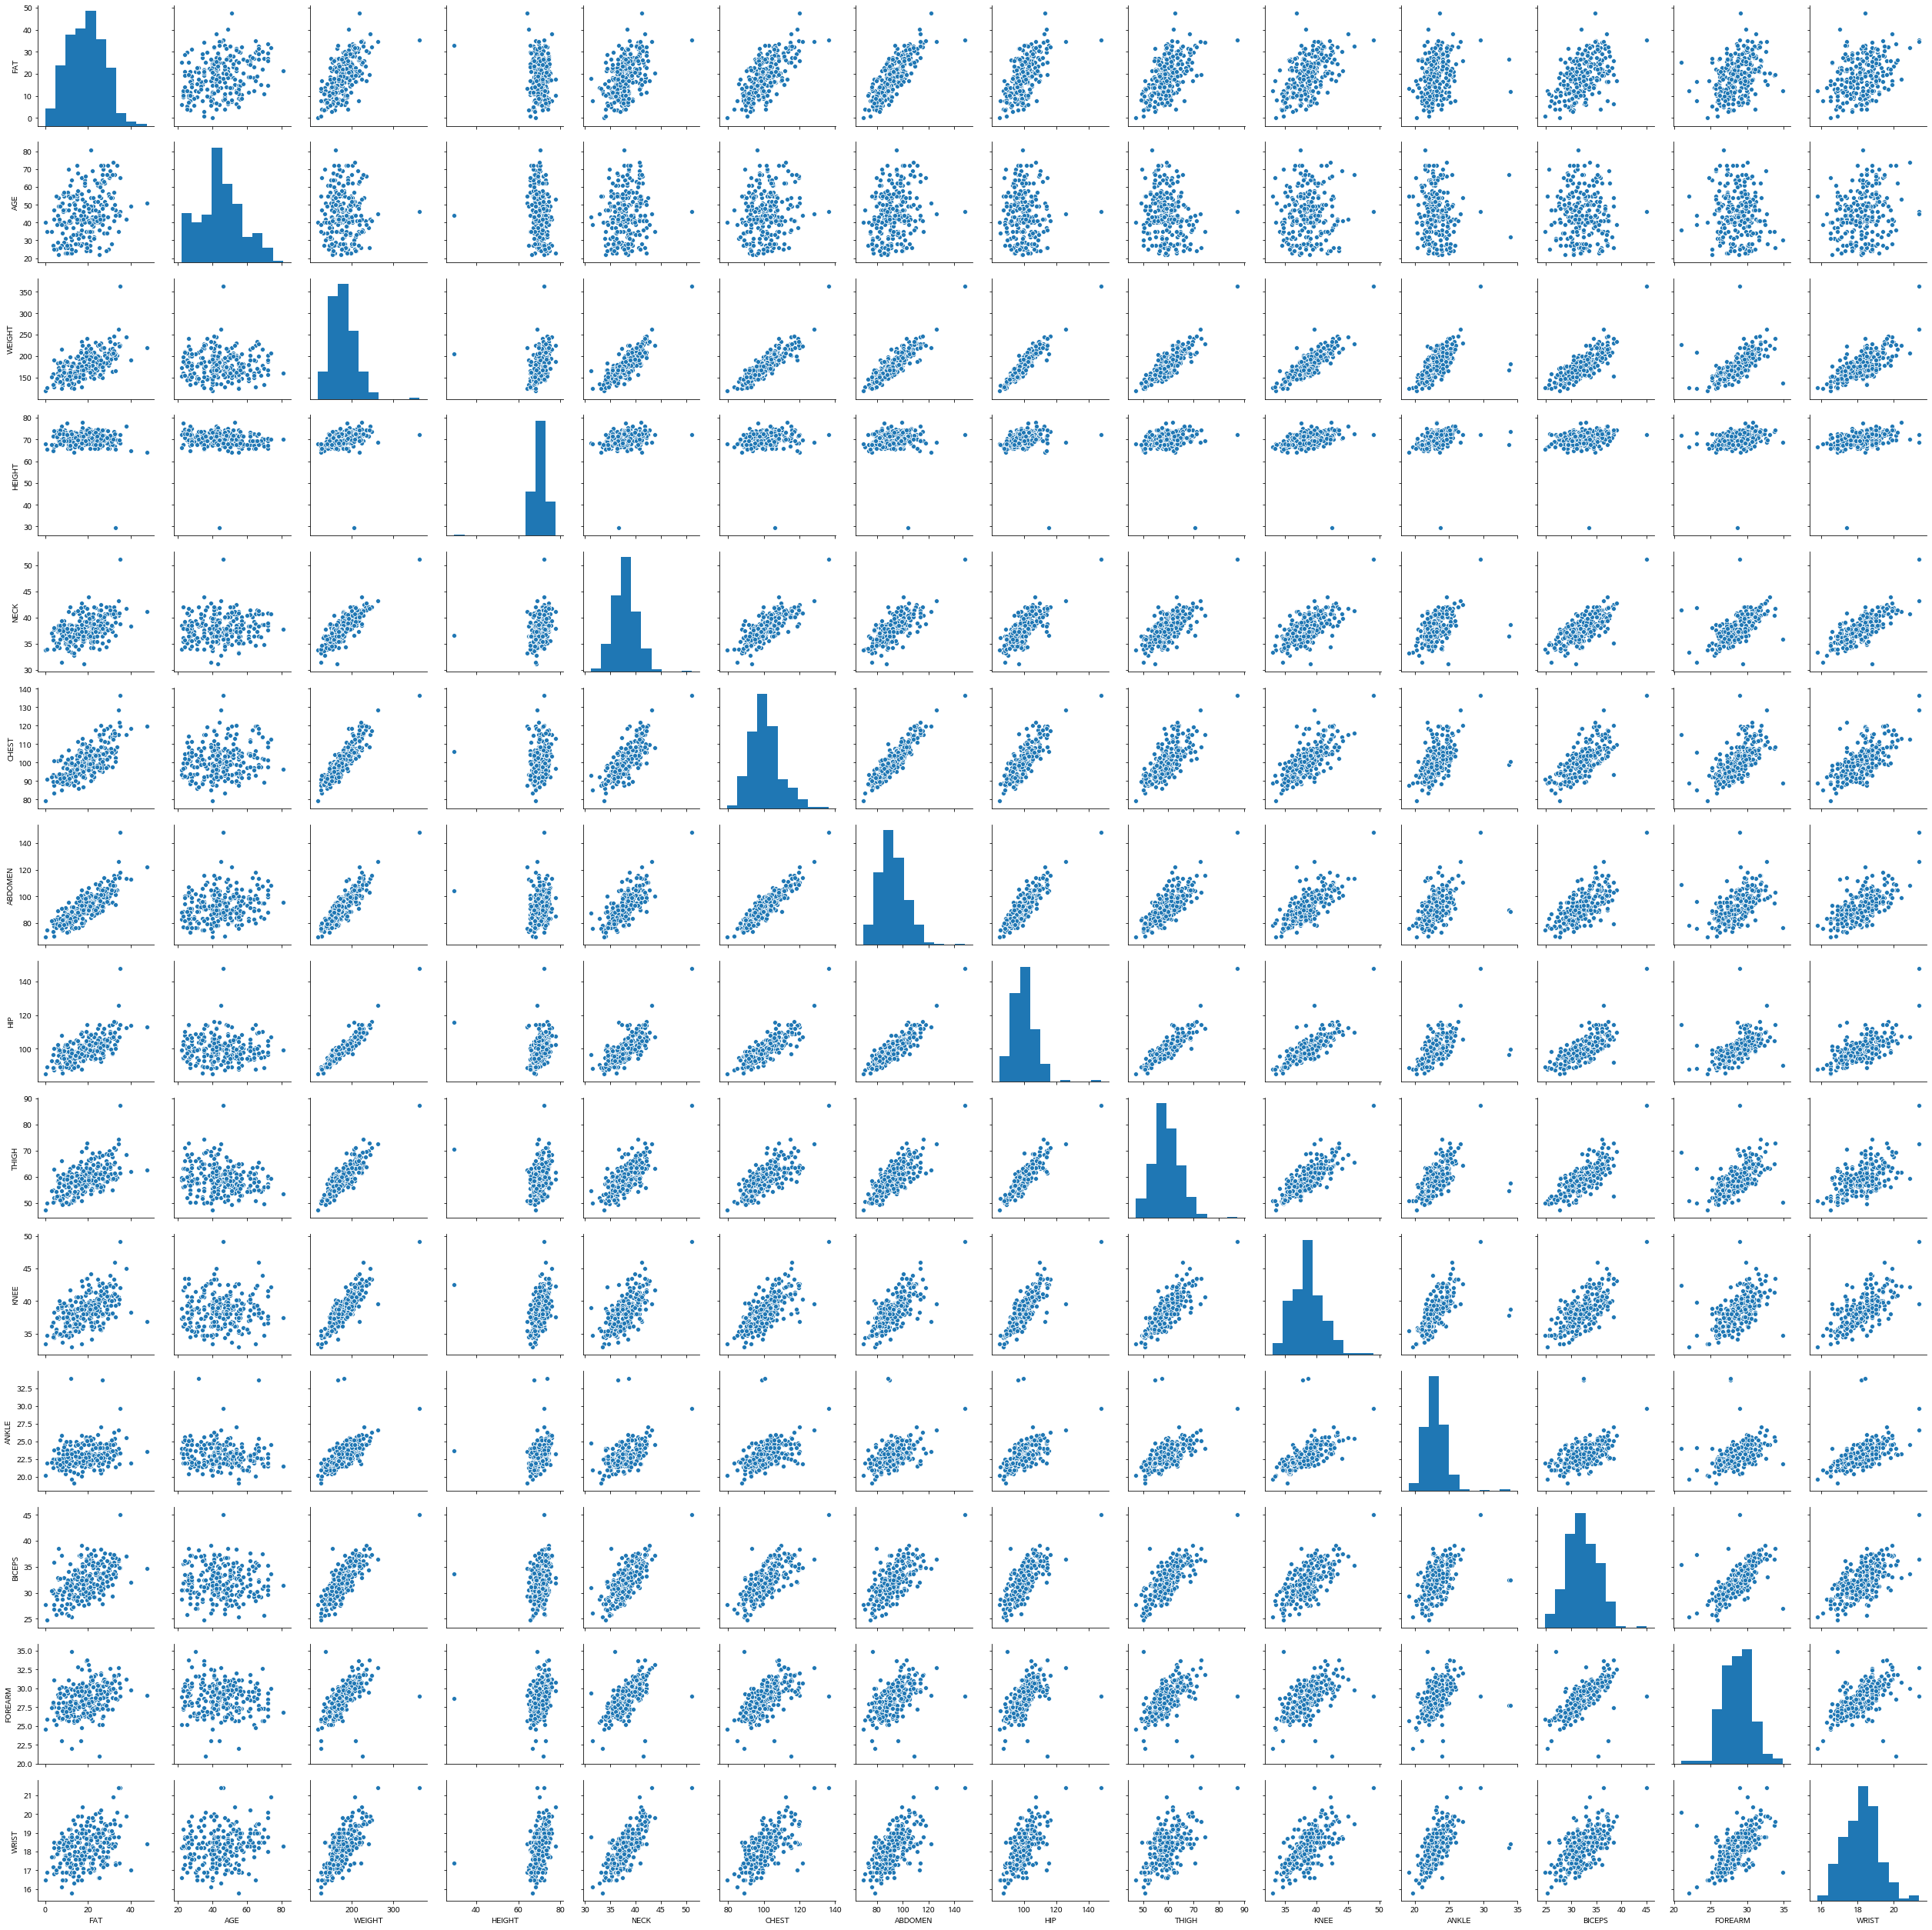

In [36]:
sns.pairplot(df)

In [37]:
df.corr().round(3)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


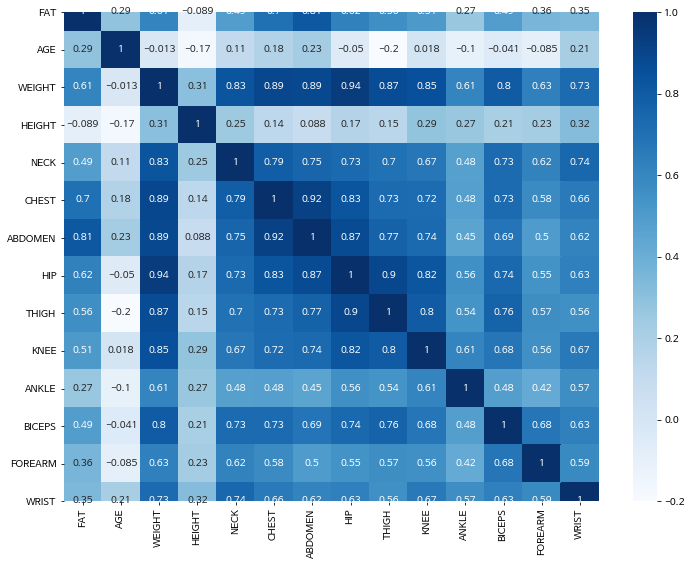

In [43]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr().round(3), annot=True, cmap='Blues')


# step 3 회귀모델생성: 설명변수 전체

In [45]:
model =smf.ols(formula='FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE+ \
                        ANKLE + BICEPS + FOREARM + WRIST', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           7.72e-64
Time:                        15:34:36   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

# 회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [47]:
df_x = df.drop("FAT", axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


# 회귀모델생성 : 설명변수 다중공선성 처리
## weight제외

In [49]:
model =smf.ols(formula='FAT~AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE+ \
                        ANKLE + BICEPS + FOREARM + WRIST', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.75e-64
Time:                        15:49:40   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [50]:
df_x = df.drop(["FAT", "WEIGHT"], axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


# step 4 후진제거법을 이용한 변수 선택

In [53]:
df_y = df['FAT']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_x, df_y)
rfe.support_
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variable : ", selected_cols)
print("Removed Variable : ", removed_cols)



Selected Variable :  Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variable :  Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


## 후진제거법을 이용한 변수 선택 및 모델 생성

In [54]:
rfe_model = smf.ols(formula='FAT~NECK + ABDOMEN + HIP + FOREARM + WRIST', data = df)
rfe_result = rfe_model.fit()
print(rfe_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        16:03:59   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

## 후진제거법을 이용한 변수 선택 - 선택된 설명변수의 다중공선성 재진단

In [57]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_vif_rfe = pd.DataFrame()
df_vif_rfe['variable'] = df_x_rfe_const.columns
df_vif_rfe["VIF"] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_vif_rfe.sort_values('VIF', inplace=True)
df_vif_rfe.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


# step 5 결론 도출

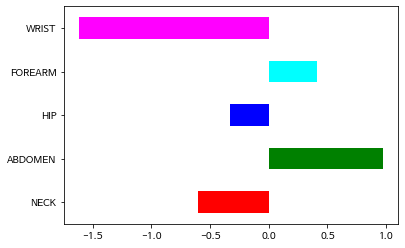

In [62]:
ref_coef = pd.DataFrame({"Coef" :rfe_result.params.values[1:]}, index= selected_cols)
ref_coef.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])

In [63]:
scaler = StandardScaler()
cols = df_x.columns
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)

df_scaled['FAT'] = df['FAT']
reg_model_scaled = smf.ols(formula='FAT~NECK + ABDOMEN + HIP + FOREARM + WRIST', data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())



                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        16:15:29   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

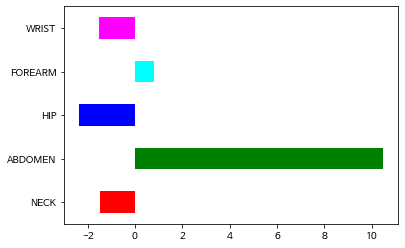

In [65]:
ref_coef2 = pd.DataFrame({"Coef" :reg_result_scaled.params.values[1:]}, index= selected_cols)
ref_coef2.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])